# Lambdy w Pythonie

In [1]:
# W poprzedniej lekcji dodaliśmy .assign(). Czy możemy dołączyć go do naszego pociągu?

import pandas as pd

df = pd.read_csv(
    'data/forex_usd_data.csv',
    parse_dates=['date(y-m-d)'],
    index_col='date(y-m-d)',
).rename(columns={
    'Polish Zloty': 'PLN',
    'Euro': 'EUR',
}).assign(
    PLN_EUR=df['PLN'] / df['EUR'],  # ❌ źle - na typ etapie nie ma w ogóle zmiennej df
)

NameError: name 'df' is not defined

In [2]:
# W ten sposób się nie uda, ale jest na to obejście - w assign można podać nie tylko obiekty typu Series, ale także funkcję, która przyjmie cały DataFrame i zwróci taki Series:

import pandas as pd

def pln_eur(x):
    return x['PLN'] / x['EUR']

df = pd.read_csv(
    'data/forex_usd_data.csv',
    parse_dates=['date(y-m-d)'],
    index_col='date(y-m-d)',
).rename(columns={
    'Polish Zloty': 'PLN',
    'Euro': 'EUR',
}).assign(
    PLN_EUR=pln_eur,  # ✅ dobrze; zwróć uwagę na brak nawiasów - przekazujemy FUNKCJĘ, a nie rezultat jej wywołania
)

df

,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar,PLN_EUR
date(y-m-d),,,,,,,,,,,,,,,,,,,,,
2011-01-01,3.969000,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,6.591000,...,6.721450,0.934500,29.140000,30.020000,6.340000,1.537400,3.67310,0.640553,4.300000e+00,3.965396
2011-01-02,3.969000,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,6.591000,...,6.721450,0.933800,29.099001,30.020000,6.340000,1.537400,3.67310,0.641067,4.300000e+00,3.964384
2011-01-03,3.973500,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,6.591000,...,6.693788,0.933069,29.120000,30.084999,6.390000,1.557411,3.67320,0.645615,4.300000e+00,3.950277
2011-01-04,3.971000,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,6.608000,...,6.726967,0.947903,29.175004,30.104903,6.360000,1.547801,3.67315,0.641558,4.300000e+00,3.936147
2011-01-05,3.971500,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,6.588500,...,6.766127,0.964490,29.170000,30.216193,6.380000,1.543853,3.67310,0.645308,4.300000e+00,3.872866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,98.736445,1.383440,0.376000,11.311807,5.448215,1.358174,1.689414,1.267304,809.029363,6.446639,...,8.759269,0.933964,27.842308,33.657387,6.791447,8.889614,3.67250,0.742524,4.191044e+11,4.606475
2021-10-01,98.775373,1.375609,0.376000,11.308244,5.368396,1.355184,1.686547,1.266198,803.116486,6.447531,...,8.753079,0.929910,27.814423,33.650881,6.790072,8.863875,3.67250,0.737063,4.217250e+11,4.576981
2021-10-02,98.706094,1.377447,0.376000,11.308076,5.366149,1.357800,1.686570,1.265100,802.961819,6.446568,...,8.759742,0.930556,27.770491,33.613309,6.791937,8.858009,3.67250,0.738259,4.199616e+11,4.580930


In [3]:
# Taka składnia jest jednak nieczytelna.
# Na szczęście istnieją tzw. lambdy, które pozwalają szybko stworzyć jednolinijkową funkcję.
# Poniższy kod:

def pln_eur(x):
    return x['PLN'] / x['EUR']

# Można zapisać także w ten sposób:

pln_eur = lambda x: x['PLN'] / x['EUR']

In [4]:
# A dzięki temu cały kod wygląda teraz następująco:

df = pd.read_csv(
    'data/forex_usd_data.csv',
    parse_dates=['date(y-m-d)'],
    index_col='date(y-m-d)',
).rename(columns={
    'Polish Zloty': 'PLN',
    'Euro': 'EUR',
}).assign(
    PLN_EUR=lambda x: x['PLN'] / x['EUR'],  # ✅ nie potrzebujemy przypisywać lambdy do żadnej zmiennej - po prostu od razu przekazujemy ją jako argument
)

df

,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar,PLN_EUR
date(y-m-d),,,,,,,,,,,,,,,,,,,,,
2011-01-01,3.969000,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,6.591000,...,6.721450,0.934500,29.140000,30.020000,6.340000,1.537400,3.67310,0.640553,4.300000e+00,3.965396
2011-01-02,3.969000,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,6.591000,...,6.721450,0.933800,29.099001,30.020000,6.340000,1.537400,3.67310,0.641067,4.300000e+00,3.964384
2011-01-03,3.973500,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,6.591000,...,6.693788,0.933069,29.120000,30.084999,6.390000,1.557411,3.67320,0.645615,4.300000e+00,3.950277
2011-01-04,3.971000,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,6.608000,...,6.726967,0.947903,29.175004,30.104903,6.360000,1.547801,3.67315,0.641558,4.300000e+00,3.936147
2011-01-05,3.971500,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,6.588500,...,6.766127,0.964490,29.170000,30.216193,6.380000,1.543853,3.67310,0.645308,4.300000e+00,3.872866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,98.736445,1.383440,0.376000,11.311807,5.448215,1.358174,1.689414,1.267304,809.029363,6.446639,...,8.759269,0.933964,27.842308,33.657387,6.791447,8.889614,3.67250,0.742524,4.191044e+11,4.606475
2021-10-01,98.775373,1.375609,0.376000,11.308244,5.368396,1.355184,1.686547,1.266198,803.116486,6.447531,...,8.753079,0.929910,27.814423,33.650881,6.790072,8.863875,3.67250,0.737063,4.217250e+11,4.576981
2021-10-02,98.706094,1.377447,0.376000,11.308076,5.366149,1.357800,1.686570,1.265100,802.961819,6.446568,...,8.759742,0.930556,27.770491,33.613309,6.791937,8.858009,3.67250,0.738259,4.199616e+11,4.580930


# 🔴 Ćwiczenie

Zrefaktoryzuj rozwiązanie poprzedniego ćwiczenia tak, aby w assign użyć lambdy i uniknąć dodatkowych tymczasowych przypisań do zmiennej `df`.

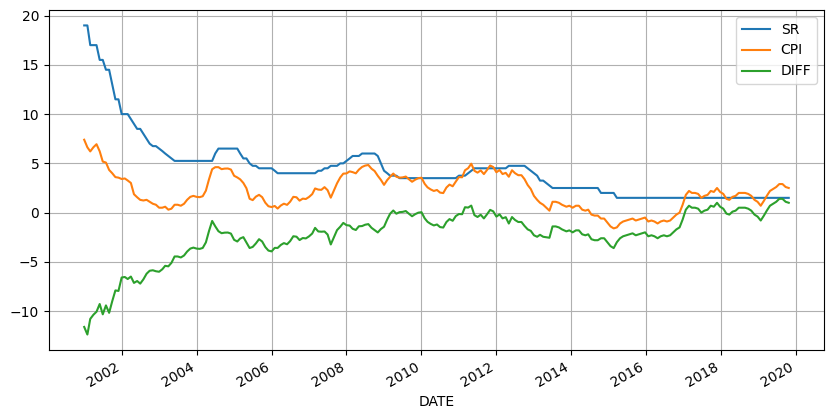

In [3]:
import pandas as pd
import matplotlib.pyplot

macro = pd.read_csv (
        'data\macroeconomicsPL.csv',
        parse_dates=['DATE'],
        index_col='DATE',
        dayfirst=True,
        skipfooter=3,
        engine="python",
        thousands=',',
        na_values={
            'SPD': '-99'
        },
).rename(columns={
    'sr_NBP': 'SR',
    'WIBOR 3M': 'WIBOR'
}).assign(
    DIFF=lambda x: x['CPI'] - x['SR'],
)

macro.plot(
    y=['SR', 'CPI', 'DIFF'],
    figsize=(10,5),
    grid=True
);